In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 14)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

In [6]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [7]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    if 'Korea' in c:
        c = 'S.Korea'
    if c == 'United Kingdom':
        c = 'UK'
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [8]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France',
                      'S.Korea', 'Iran', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'Green', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [9]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [10]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,122607,1200631,231532,10513,38826,35878,4739,46807,37057,468,35298,28026,91895,10230
2020-11-02,123097,1206746,232068,10669,39059,36257,4739,46943,37485,472,35738,28264,92100,10262
2020-11-03,123611,1215197,233639,10717,39412,36495,4739,47340,37915,474,36160,28611,92593,10334
2020-11-04,124315,1226199,234714,10949,39764,38118,4740,47832,38728,475,36579,28996,93228,10385
2020-11-05,124985,1234262,235876,11110,40192,38486,4741,48210,39088,476,36985,29285,93772,10432
2020-11-06,125562,1243800,237005,11240,40638,38833,4741,48565,39916,477,37409,29654,94323,10493
2020-11-07,126121,1251351,238018,11306,41063,38833,4741,48978,40220,478,37832,30010,94808,10547
2020-11-08,126611,1257100,238491,11372,41394,38833,4741,49134,40490,480,38291,30292,95027,10575
2020-11-09,127059,1264225,239189,11408,41750,39345,4741,49329,41049,485,38749,30546,95225,10620


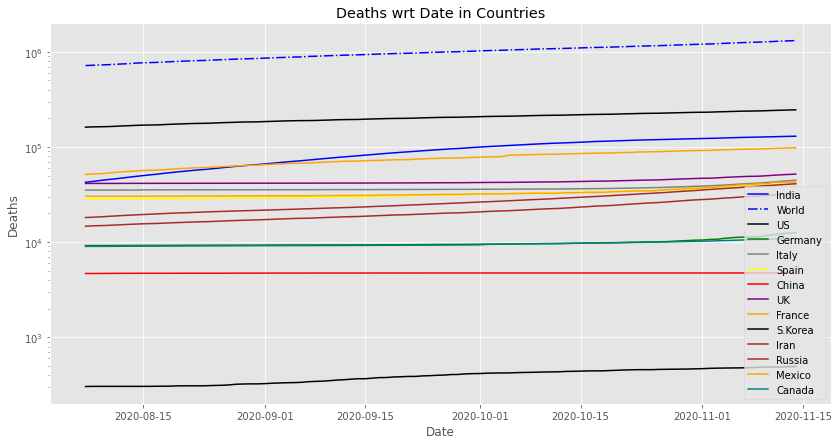

In [11]:
plotter(Deaths[Important_countries].tail(100), 'Deaths')

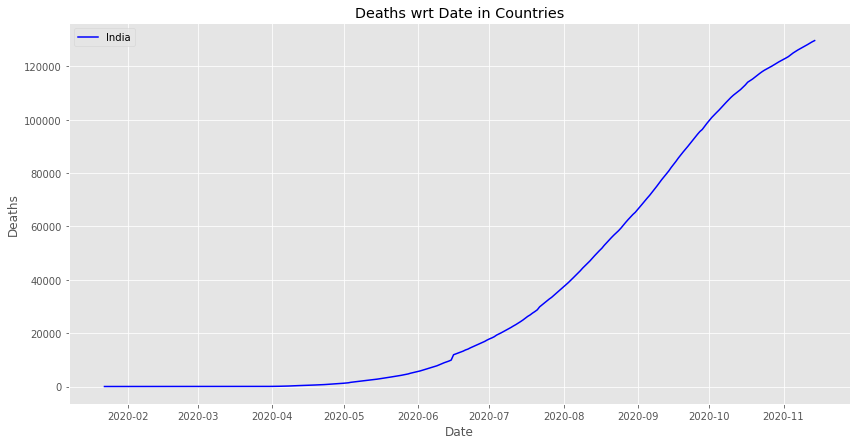

In [12]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

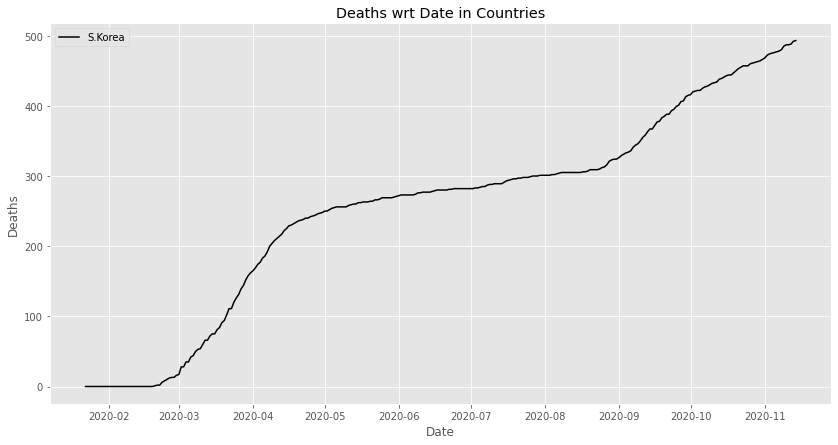

In [13]:
plotter(Deaths[['S.Korea']], 'Deaths', False)

In [14]:
Removed = np.round(Deaths/0.01).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,12260700,120063100,23153200,1051300,3882600,3587800,473900,4680700,3705700,46800,3529800,2802600,9189500,1023000
2020-11-02,12309700,120674600,23206800,1066900,3905900,3625700,473900,4694300,3748500,47200,3573800,2826400,9210000,1026200
2020-11-03,12361100,121519700,23363900,1071700,3941200,3649500,473900,4734000,3791500,47400,3616000,2861100,9259300,1033400
2020-11-04,12431500,122619900,23471400,1094900,3976400,3811800,474000,4783200,3872800,47500,3657900,2899600,9322800,1038500
2020-11-05,12498500,123426200,23587600,1111000,4019200,3848600,474100,4821000,3908800,47600,3698500,2928500,9377200,1043200
2020-11-06,12556200,124380000,23700500,1124000,4063800,3883300,474100,4856500,3991600,47700,3740900,2965400,9432300,1049300
2020-11-07,12612100,125135100,23801800,1130600,4106300,3883300,474100,4897800,4022000,47800,3783200,3001000,9480800,1054700
2020-11-08,12661100,125710000,23849100,1137200,4139400,3883300,474100,4913400,4049000,48000,3829100,3029200,9502700,1057500
2020-11-09,12705900,126422500,23918900,1140800,4175000,3934500,474100,4932900,4104900,48500,3874900,3054600,9522500,1062000


In [15]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,7997,87023,11428,715,2283,2103,0,3071,3732,24,4923,3987,5728,414
2020-11-02,7900,88137,11499,827,2443,2265,0,3127,3838,25,5026,4059,5762,430
2020-11-03,7697,89995,12130,835,2707,2285,0,3283,3987,24,5126,4138,5700,485
2020-11-04,7699,94440,12087,1038,2932,3752,1,3584,4653,22,5233,4210,5813,502
2020-11-05,7679,96599,12374,1150,3224,3965,2,3773,4851,21,5335,4213,6357,516
2020-11-06,7606,99216,12563,1262,3579,4081,2,3904,5380,20,5424,4301,6011,553
2020-11-07,7587,101073,12636,1271,3853,4081,2,4143,5684,21,5512,4363,6065,578
2020-11-08,7597,102682,12731,1310,4056,4081,2,4148,5954,23,5675,4417,6103,580
2020-11-09,7557,104160,12922,1317,4271,4314,2,4241,5997,25,5796,4454,6054,594


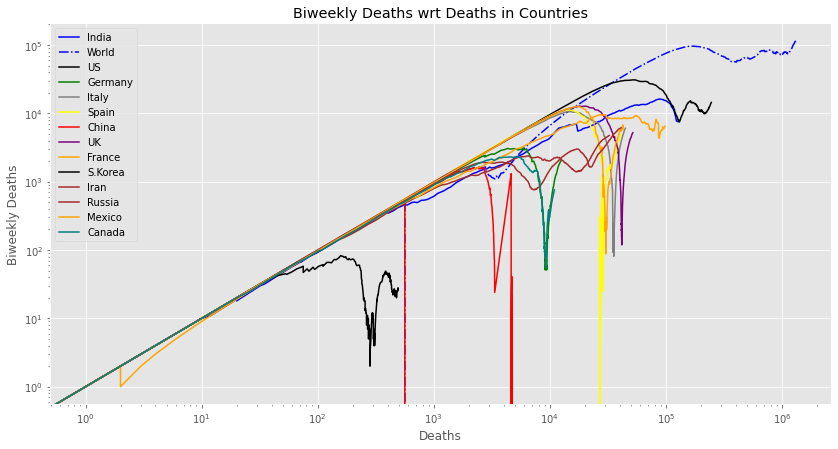

In [16]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

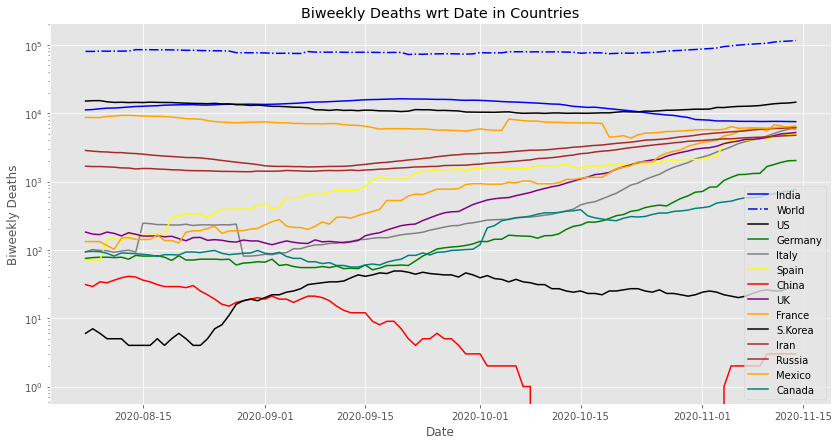

In [17]:
plotter(Biweekly_Deaths[Important_countries].tail(100), 'Biweekly Deaths', True)

In [18]:
# Biweekly increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,-3928,10761,1308,450,1726,414,0,1775,2578,2,1505,1208,-1351,131
2020-11-02,-3728,13893,1386,539,1829,498,0,1770,2508,0,1506,1229,1301,158
2020-11-03,-3662,14940,1779,519,2032,561,0,1761,2442,-1,1511,1224,1155,218
2020-11-04,-3391,18650,1547,709,2161,1948,1,1941,3041,-4,1545,1179,1124,212
2020-11-05,-3137,21164,1935,784,2339,2132,2,2018,3153,-6,1573,1080,2038,209
2020-11-06,-2934,22955,2151,883,2631,2258,2,2012,3445,-7,1537,1085,1196,251
2020-11-07,-2613,23949,1910,856,2783,2258,2,2158,3749,-4,1485,1047,964,270
2020-11-08,-2267,25335,2048,874,2884,2258,2,2077,4019,-1,1603,1013,960,251
2020-11-09,-2089,25106,2066,866,2997,2407,2,2118,3648,-1,1659,956,828,248


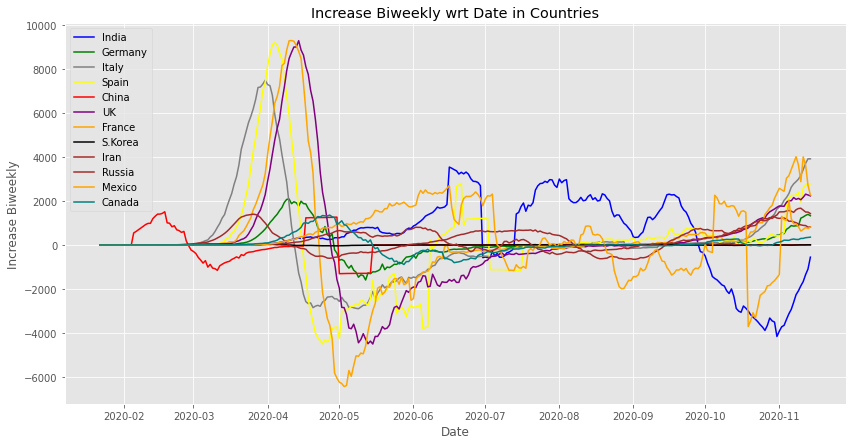

In [19]:
plotter(Increase_Biweekly[[c for c in Important_countries if c not in ['World', 'US']]], 'Increase Biweekly', False)

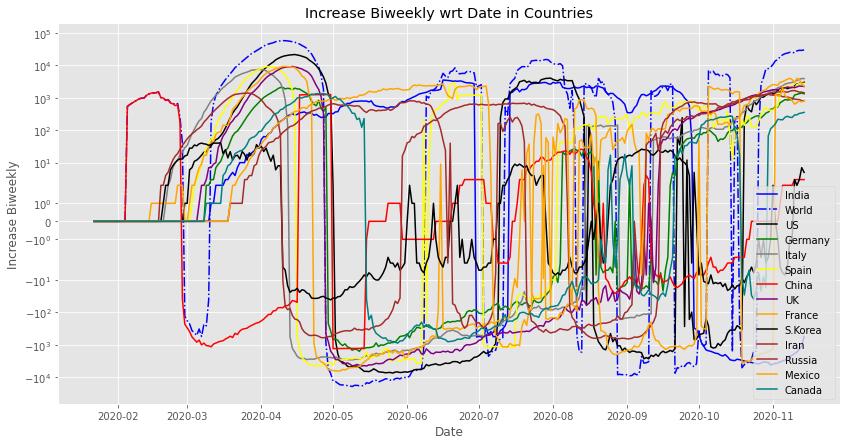

In [20]:
plotter(Increase_Biweekly, 'Increase Biweekly', log = 'symlog')

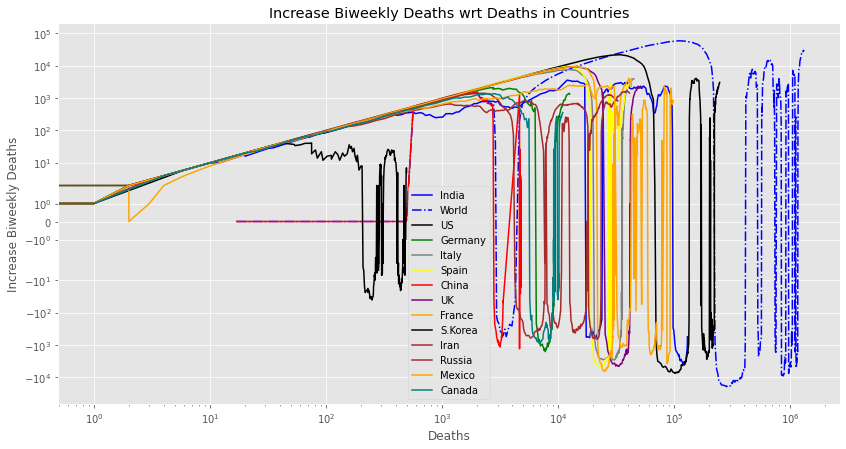

In [21]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [22]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,-0.4912,0.1237,0.1145,0.6294,0.7560,0.1969,NaN,0.5780,0.6908,0.0833,0.3057,0.3030,-0.2359,0.3164
2020-11-02,-0.4719,0.1576,0.1205,0.6518,0.7487,0.2199,NaN,0.5660,0.6535,0.0000,0.2996,0.3028,0.2258,0.3674
2020-11-03,-0.4758,0.1660,0.1467,0.6216,0.7506,0.2455,NaN,0.5364,0.6125,-0.0417,0.2948,0.2958,0.2026,0.4495
2020-11-04,-0.4404,0.1975,0.1280,0.6830,0.7370,0.5192,1.0,0.5416,0.6536,-0.1818,0.2952,0.2800,0.1934,0.4223
2020-11-05,-0.4085,0.2191,0.1564,0.6817,0.7255,0.5377,1.0,0.5349,0.6500,-0.2857,0.2948,0.2563,0.3206,0.4050
2020-11-06,-0.3857,0.2314,0.1712,0.6997,0.7351,0.5533,1.0,0.5154,0.6403,-0.3500,0.2834,0.2523,0.1990,0.4539
2020-11-07,-0.3444,0.2369,0.1512,0.6735,0.7223,0.5533,1.0,0.5209,0.6596,-0.1905,0.2694,0.2400,0.1589,0.4671
2020-11-08,-0.2984,0.2467,0.1609,0.6672,0.7110,0.5533,1.0,0.5007,0.6750,-0.0435,0.2825,0.2293,0.1573,0.4328
2020-11-09,-0.2764,0.2410,0.1599,0.6576,0.7017,0.5580,1.0,0.4994,0.6083,-0.0400,0.2862,0.2146,0.1368,0.4175


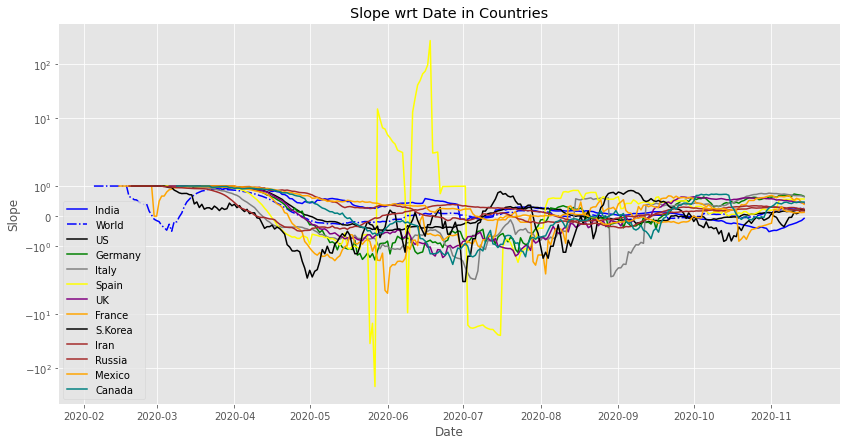

In [23]:
plotter(Slope[[c for c in Important_countries if c!='China']], 'Slope', log = 'symlog')

In [24]:
# Biweekly increase in increase of Biweekly Deaths
Growth_Increase_Biweekly = Increase_Biweekly-Increase_Biweekly.shift(14)
Growth_Increase_Biweekly = Growth_Increase_Biweekly.fillna(0).astype('int')
Growth_Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,-1050,10957,1596,328,1448,316,2,1053,2338,17,743,340,-2835,114
2020-11-02,-722,19005,1728,415,1493,293,2,995,2149,9,700,354,5020,167
2020-11-03,-486,19040,1561,364,1649,419,2,860,1854,11,659,294,4610,247
2020-11-04,-104,22222,964,539,1693,1672,2,952,2445,4,675,183,4212,221
2020-11-05,247,24630,1511,576,1756,1869,3,954,2470,0,684,19,5376,214
2020-11-06,563,25787,1782,652,1993,2132,2,864,2436,-3,526,33,4034,281
2020-11-07,1018,25466,1111,602,2035,2132,2,963,2740,2,357,-78,3262,310
2020-11-08,1477,26930,1433,600,2043,2132,2,844,3010,2,486,-159,3168,270
2020-11-09,1803,25006,1289,587,2077,2213,2,870,2258,0,559,-247,2944,254


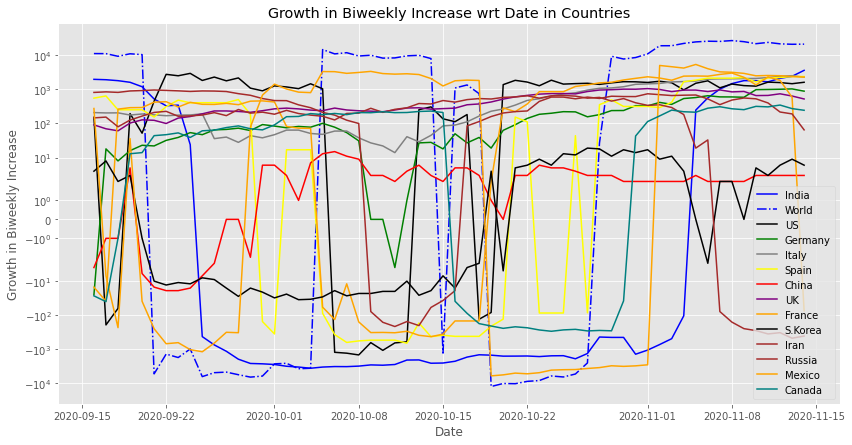

In [25]:
plotter(Growth_Increase_Biweekly.tail(60), 'Growth in Biweekly Increase', log = 'symlog')

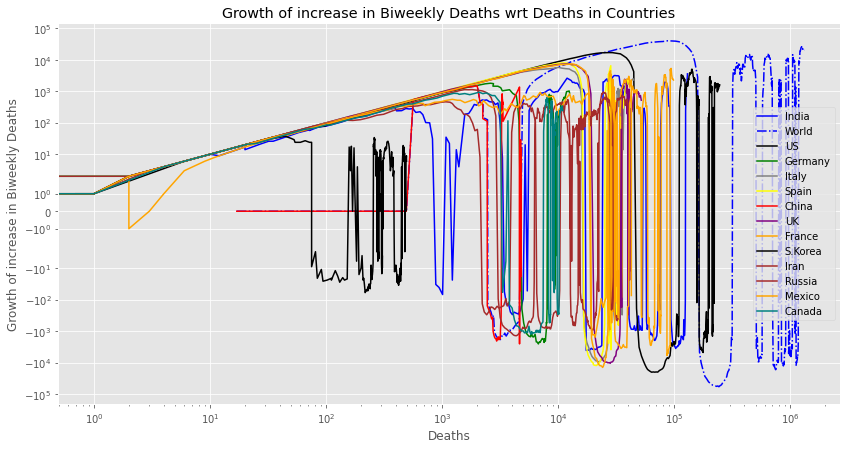

In [26]:
plot2(Deaths, Growth_Increase_Biweekly, 'Growth of increase in Biweekly Deaths', log = 'symlog')

In [27]:
Slope_growth = np.round(Growth_Increase_Biweekly/Biweekly_Deaths, 4)
Slope_growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,-0.1313,0.1259,0.1397,0.4587,0.6343,0.1503,inf,0.3429,0.6265,0.7083,0.1509,0.0853,-0.4949,0.2754
2020-11-02,-0.0914,0.2156,0.1503,0.5018,0.6111,0.1294,inf,0.3182,0.5599,0.3600,0.1393,0.0872,0.8712,0.3884
2020-11-03,-0.0631,0.2116,0.1287,0.4359,0.6092,0.1834,inf,0.2620,0.4650,0.4583,0.1286,0.0710,0.8088,0.5093
2020-11-04,-0.0135,0.2353,0.0798,0.5193,0.5774,0.4456,2.0,0.2656,0.5255,0.1818,0.1290,0.0435,0.7246,0.4402
2020-11-05,0.0322,0.2550,0.1221,0.5009,0.5447,0.4714,1.5,0.2528,0.5092,0.0000,0.1282,0.0045,0.8457,0.4147
2020-11-06,0.0740,0.2599,0.1418,0.5166,0.5569,0.5224,1.0,0.2213,0.4528,-0.1500,0.0970,0.0077,0.6711,0.5081
2020-11-07,0.1342,0.2520,0.0879,0.4736,0.5282,0.5224,1.0,0.2324,0.4821,0.0952,0.0648,-0.0179,0.5378,0.5363
2020-11-08,0.1944,0.2623,0.1126,0.4580,0.5037,0.5224,1.0,0.2035,0.5055,0.0870,0.0856,-0.0360,0.5191,0.4655
2020-11-09,0.2386,0.2401,0.0998,0.4457,0.4863,0.5130,1.0,0.2051,0.3765,0.0000,0.0964,-0.0555,0.4863,0.4276


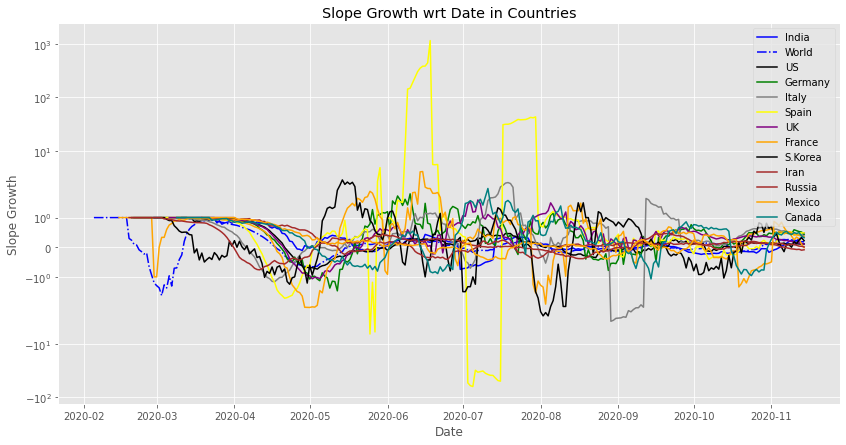

In [28]:
plotter(Slope_growth[[c for c in Important_countries if c!='China']], 'Slope Growth', log = 'symlog')

In [29]:
Biweekly_Growth = np.round(Deaths/Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,1.0698,1.0781,1.0519,1.0730,1.0625,1.0623,1.0000,1.0702,1.1120,1.0541,1.1621,1.1659,1.0665,1.0422
2020-11-02,1.0686,1.0788,1.0521,1.0840,1.0667,1.0666,1.0000,1.0714,1.1141,1.0559,1.1636,1.1677,1.0667,1.0437
2020-11-03,1.0664,1.0800,1.0548,1.0845,1.0738,1.0668,1.0000,1.0745,1.1175,1.0533,1.1652,1.1691,1.0656,1.0492
2020-11-04,1.0660,1.0834,1.0543,1.1047,1.0796,1.1092,1.0002,1.0810,1.1366,1.0486,1.1669,1.1699,1.0665,1.0508
2020-11-05,1.0655,1.0849,1.0554,1.1155,1.0872,1.1149,1.0004,1.0849,1.1417,1.0462,1.1686,1.1680,1.0727,1.0520
2020-11-06,1.0645,1.0867,1.0560,1.1265,1.0966,1.1174,1.0004,1.0874,1.1558,1.0438,1.1696,1.1696,1.0681,1.0556
2020-11-07,1.0640,1.0879,1.0561,1.1267,1.1035,1.1174,1.0004,1.0924,1.1646,1.0460,1.1705,1.1701,1.0683,1.0580
2020-11-08,1.0638,1.0889,1.0564,1.1302,1.1086,1.1174,1.0004,1.0922,1.1724,1.0503,1.1740,1.1707,1.0686,1.0580
2020-11-09,1.0632,1.0898,1.0571,1.1305,1.1140,1.1231,1.0004,1.0941,1.1711,1.0543,1.1759,1.1707,1.0679,1.0592


In [30]:
Reproductivity = np.round(Biweekly_Deaths/Biweekly_Deaths.shift(14), 4)
Reproductivity[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,0.6706,1.1411,1.1292,2.6981,4.0987,1.2451,NaN,2.3696,3.2340,1.0909,1.4403,1.4347,0.8092,1.4629
2020-11-02,0.6794,1.1871,1.1371,2.8715,3.9788,1.2818,NaN,2.3043,2.8857,1.0000,1.4278,1.4343,1.2916,1.5809
2020-11-03,0.6776,1.1991,1.1719,2.6424,4.0104,1.3254,NaN,2.1570,2.5806,0.9600,1.4180,1.4200,1.2541,1.8165
2020-11-04,0.6942,1.2461,1.1468,3.1550,3.8029,2.0798,inf,2.1814,2.8865,0.8462,1.4189,1.3890,1.2397,1.7310
2020-11-05,0.7100,1.2806,1.1854,3.1421,3.6429,2.1631,inf,2.1499,2.8569,0.7778,1.4181,1.3447,1.4719,1.6808
2020-11-06,0.7216,1.3010,1.2066,3.3298,3.7753,2.2386,inf,2.0634,2.7804,0.7407,1.3954,1.3374,1.2484,1.8311
2020-11-07,0.7438,1.3105,1.1781,3.0627,3.6009,2.2386,inf,2.0872,2.9375,0.8400,1.3688,1.3157,1.1890,1.8766
2020-11-08,0.7702,1.3275,1.1917,3.0046,3.4608,2.2386,inf,2.0029,3.0770,0.9583,1.3937,1.2976,1.1867,1.7629
2020-11-09,0.7834,1.3176,1.1903,2.9202,3.3524,2.2622,inf,1.9976,2.5530,0.9615,1.4010,1.2733,1.1584,1.7168


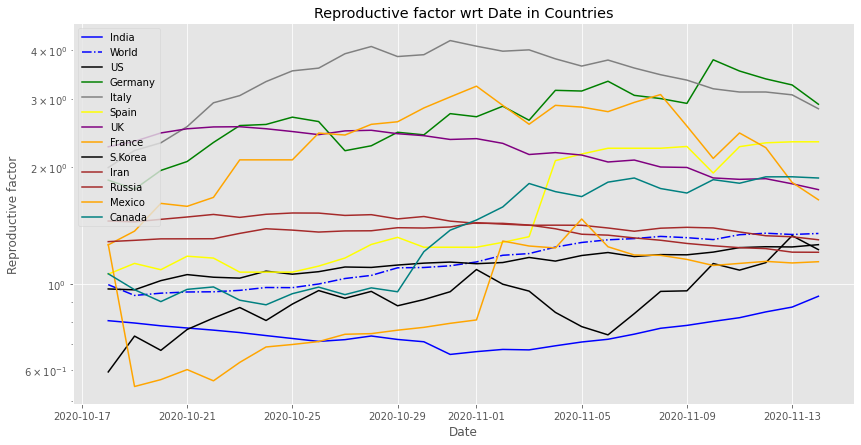

In [31]:
plotter(Reproductivity[[c for c in Important_countries if c != 'China']].tail(28), 'Reproductive factor', True)

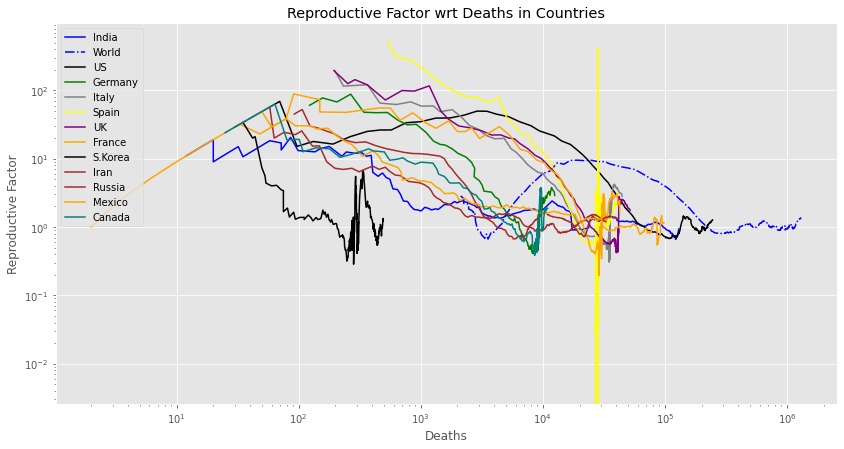

In [32]:
plot2(Deaths[[c for c in Important_countries if c != 'China']], 
      Reproductivity[[c for c in Important_countries if c != 'China']], 
      'Reproductive Factor', log = True)

In [33]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,496,4923,407,30,208,0,0,162,231,2,434,239,142,43
2020-11-02,490,6115,536,156,233,379,0,136,428,4,440,238,205,32
2020-11-03,514,8451,1571,48,353,238,0,397,430,2,422,347,493,72
2020-11-04,704,11002,1075,232,352,1623,1,492,813,1,419,385,635,51
2020-11-05,670,8063,1162,161,428,368,1,378,360,1,406,289,544,47
2020-11-06,577,9538,1129,130,446,347,0,355,828,1,424,369,551,61
2020-11-07,559,7551,1013,66,425,0,0,413,304,1,423,356,485,54
2020-11-08,490,5749,473,66,331,0,0,156,270,2,459,282,219,28
2020-11-09,448,7125,698,36,356,512,0,195,559,5,458,254,198,45


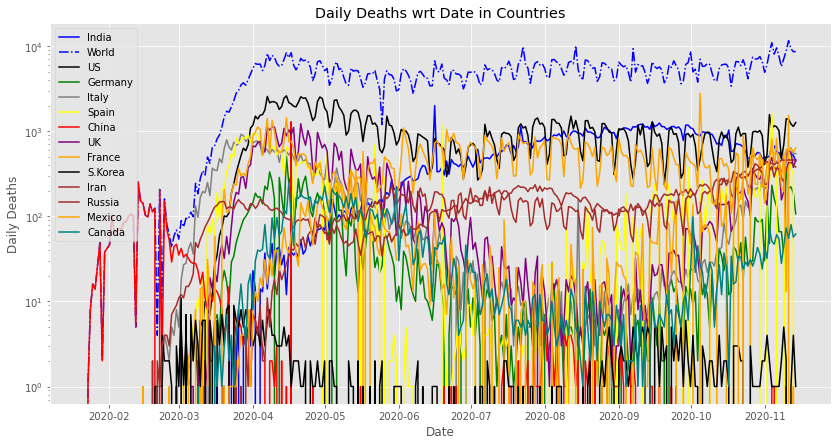

In [34]:
plotter(Daily_Deaths, 'Daily Deaths')

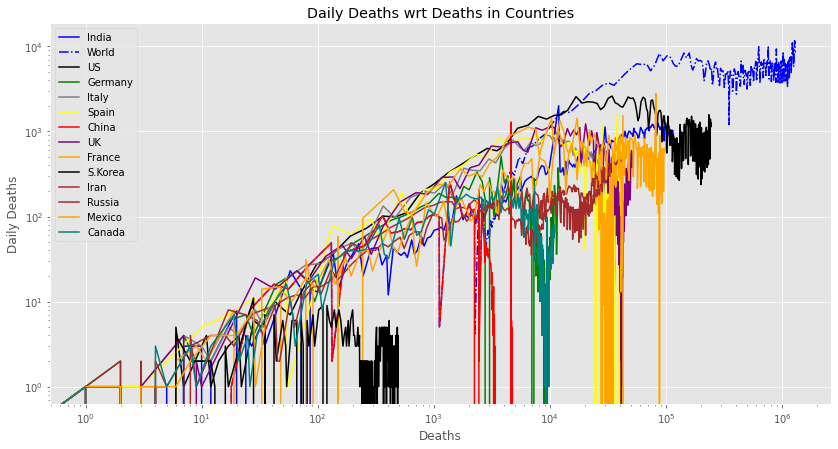

In [35]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')

In [36]:
#Confirmed = np.round(Removed + Removed*Reproductivity)
Confirmed = np.round(Removed * Biweekly_Growth)
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-01,13116497.0,129440028.0,24354851.0,1128045.0,4125262.0,3811320.0,473900.0,5009285.0,4120738.0,49332.0,4101981.0,3267551.0,9800602.0,1066171.0
2020-11-02,13154145.0,130183758.0,24415874.0,1156520.0,4166424.0,3867172.0,473900.0,5029473.0,4176204.0,49838.0,4158474.0,3300387.0,9824307.0,1071045.0
2020-11-03,13181877.0,131241276.0,24644242.0,1162259.0,4232061.0,3893287.0,473900.0,5086683.0,4237001.0,49926.0,4213363.0,3344912.0,9866710.0,1084243.0
2020-11-04,13251979.0,132846400.0,24745897.0,1209536.0,4292921.0,4228049.0,474095.0,5170639.0,4401824.0,49808.0,4268404.0,3392242.0,9942766.0,1091256.0
2020-11-05,13317152.0,133905084.0,24894353.0,1239320.0,4369674.0,4290804.0,474290.0,5230303.0,4462677.0,49799.0,4322067.0,3420488.0,10058922.0,1097446.0
2020-11-06,13366075.0,135163746.0,25027728.0,1266186.0,4456363.0,4339199.0,474290.0,5280958.0,4613491.0,49789.0,4375357.0,3468332.0,10074640.0,1107641.0
2020-11-07,13419274.0,136134475.0,25137081.0,1273847.0,4531302.0,4339199.0,474290.0,5350357.0,4684021.0,49999.0,4428236.0,3511470.0,10128339.0,1115873.0
2020-11-08,13468878.0,136885619.0,25194189.0,1285263.0,4588939.0,4339199.0,474290.0,5366415.0,4747048.0,50414.0,4495363.0,3546284.0,10154585.0,1118835.0
2020-11-09,13508913.0,137775240.0,25284669.0,1289674.0,4650950.0,4418837.0,474290.0,5397086.0,4807248.0,51134.0,4556495.0,3576020.0,10169078.0,1124870.0


In [37]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [38]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Increase Biweekly':Increase_Biweekly,
    'GBI':Growth_Increase_Biweekly,
    'Slope Increase':Slope,
    'Slope Growth':Slope_growth ,
    'Removed':Removed,
    'Biweekly Growth':Biweekly_Growth,
    'Reproductive Factor':Reproductivity,
    'Daily Deaths':Daily_Deaths,
    'Confirmed':Confirmed
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=1200]

In [39]:
LastDay_DF.sort_values('Deaths', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
World,1311192,115484,29999,21166,0.2598,0.1833,131119200,1.0966,1.3509,8636,143785315.0
US,245598,14473,3024,1615,0.2089,0.1116,24559800,1.0626,1.2641,1266,26097243.0
Brazil,165658,5774,-435,1044,-0.0753,0.1808,16565800,1.0361,0.9299,921,17163825.0
India,129635,7524,-556,3613,-0.0739,0.4802,12963500,1.0616,0.9312,447,13762052.0
Mexico,98259,6506,812,2297,0.1248,0.3531,9825900,1.0709,1.1426,635,10522556.0
UK,51858,5213,2237,523,0.4291,0.1003,5185800,1.1118,1.7517,462,5765572.0
Italy,44683,6065,3921,2283,0.6465,0.3764,4468300,1.1571,2.8288,544,5170270.0
France,42600,5774,2273,-74,0.3937,-0.0128,4260000,1.1568,1.6492,0,4927968.0
Iran,41034,6170,1429,65,0.2316,0.0105,4103400,1.1770,1.3014,452,4829702.0


In [40]:
LastDay_DF.sort_values('Reproductive Factor', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
China,4742,3,3,3,1.0000,1.0000,474200,1.0006,inf,0,474485.0
Switzerland,3351,1054,879,750,0.8340,0.7116,335100,1.4589,6.0229,36,488877.0
Sweden,6164,187,128,92,0.6845,0.4920,616400,1.0313,3.1695,0,635693.0
Germany,12511,2028,1330,886,0.6558,0.4369,1251100,1.1935,2.9054,107,1493188.0
Austria,1746,637,417,277,0.6546,0.4349,174600,1.5744,2.8955,85,274890.0
Italy,44683,6065,3921,2283,0.6465,0.3764,4468300,1.1571,2.8288,544,5170270.0
Bulgaria,2091,812,501,317,0.6170,0.3904,209100,1.6349,2.6109,36,341858.0
Bosnia and Herzegovina,1857,623,370,227,0.5939,0.3644,185700,1.5049,2.4625,49,279460.0
Spain,40769,4891,2788,2374,0.5700,0.4854,4076900,1.1363,2.3257,0,4632581.0
